# Import libraries

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, make_blobs, make_circles,make_moons, make_multilabel_classification
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Import MLP Class from MLP.py

In [2]:
from MLP import MLP

# Load Dataset #1 : Iris

In [3]:
from sklearn.datasets import load_iris

In [4]:
X, y = load_iris(return_X_y=True)

### Split Dataset to train and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

### Normalize Dataset

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### One hot encoding

In [8]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### MLP Classifier with 3 Hidden layers

In [9]:
model = MLP()

model.add_layer(units=X.shape[1], activation='linear')
model.add_layer(units=20, activation='sigmoid')
model.add_layer(units=20, activation='sigmoid')
model.add_layer(units=20, activation='sigmoid')
model.add_layer(units=y_train_encoded.shape[1], activation='softmax')

### Optimizer : GD

In [10]:
model.compile(loss='categorical cross-entropy', optimizer='GD')

In [11]:
model.summary()

[{'units': 4, 'activation': 'linear'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 3, 'activation': 'softmax'}]
Loss : categorical cross-entropy


### Train the model

In [12]:
model.fit(x_train, y_train_encoded, iters=500, eta=0.01, data_test=(x_test, y_test_encoded))

Epoch 25/500 - Train Loss : 0.5197 - Train ACC : 0.8000  - Test Loss : 0.4603 - Test ACC : 0.7333 
Epoch 50/500 - Train Loss : 0.1378 - Train ACC : 0.9417  - Test Loss : 0.1511 - Test ACC : 0.9667 
Epoch 75/500 - Train Loss : 0.0853 - Train ACC : 0.9750  - Test Loss : 0.1467 - Test ACC : 0.9333 
Epoch 100/500 - Train Loss : 0.0610 - Train ACC : 0.9917  - Test Loss : 0.1591 - Test ACC : 0.9333 
Epoch 125/500 - Train Loss : 0.0494 - Train ACC : 0.9917  - Test Loss : 0.1709 - Test ACC : 0.9333 
Epoch 150/500 - Train Loss : 0.0428 - Train ACC : 0.9917  - Test Loss : 0.1799 - Test ACC : 0.9333 
Epoch 175/500 - Train Loss : 0.0384 - Train ACC : 0.9917  - Test Loss : 0.1874 - Test ACC : 0.9333 
Epoch 200/500 - Train Loss : 0.0353 - Train ACC : 0.9917  - Test Loss : 0.1940 - Test ACC : 0.9333 
Epoch 225/500 - Train Loss : 0.0329 - Train ACC : 0.9917  - Test Loss : 0.1998 - Test ACC : 0.9333 
Epoch 250/500 - Train Loss : 0.0310 - Train ACC : 0.9917  - Test Loss : 0.2051 - Test ACC : 0.9333 
Epo

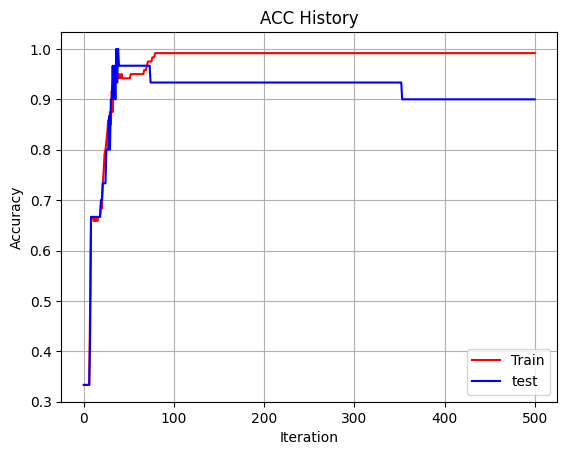

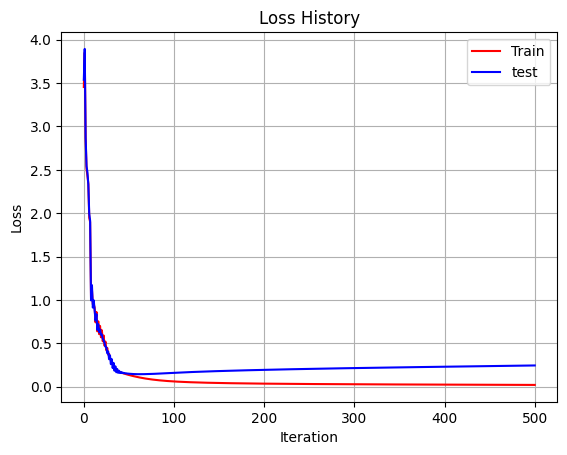

In [13]:
model.plot_history()

### Optimizer : SGD

In [14]:
model.compile(loss='categorical cross-entropy', optimizer='SGD')

In [15]:
model.summary()

[{'units': 4, 'activation': 'linear'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 3, 'activation': 'softmax'}]
Loss : categorical cross-entropy


### Train the model

In [16]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 1.3482 - Train ACC : 0.3833  - Test Loss : 1.3029 - Test ACC : 0.4000 
Epoch 50/500 - Train Loss : 0.9565 - Train ACC : 0.4583  - Test Loss : 0.9440 - Test ACC : 0.4667 
Epoch 75/500 - Train Loss : 0.9019 - Train ACC : 0.7167  - Test Loss : 0.8943 - Test ACC : 0.8000 
Epoch 100/500 - Train Loss : 0.8619 - Train ACC : 0.6500  - Test Loss : 0.8691 - Test ACC : 0.6333 
Epoch 125/500 - Train Loss : 0.8264 - Train ACC : 0.8500  - Test Loss : 0.8391 - Test ACC : 0.7333 
Epoch 150/500 - Train Loss : 0.8144 - Train ACC : 0.7000  - Test Loss : 0.8343 - Test ACC : 0.6000 
Epoch 175/500 - Train Loss : 0.7977 - Train ACC : 0.7583  - Test Loss : 0.8235 - Test ACC : 0.6333 
Epoch 200/500 - Train Loss : 0.7858 - Train ACC : 0.6833  - Test Loss : 0.8028 - Test ACC : 0.7000 
Epoch 225/500 - Train Loss : 0.7446 - Train ACC : 0.7750  - Test Loss : 0.7602 - Test ACC : 0.7667 
Epoch 250/500 - Train Loss : 0.7311 - Train ACC : 0.6750  - Test Loss : 0.7520 - Test ACC : 0.6667 
Epo

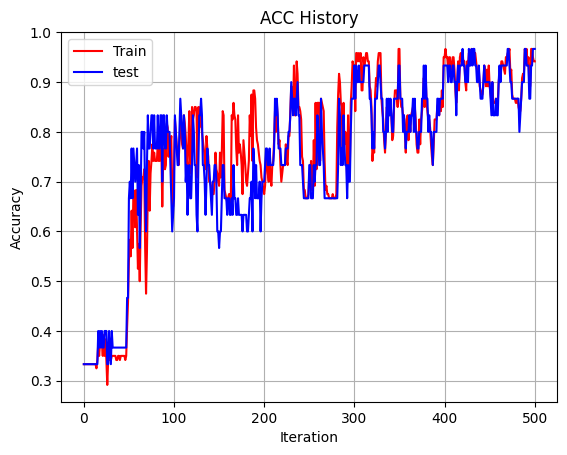

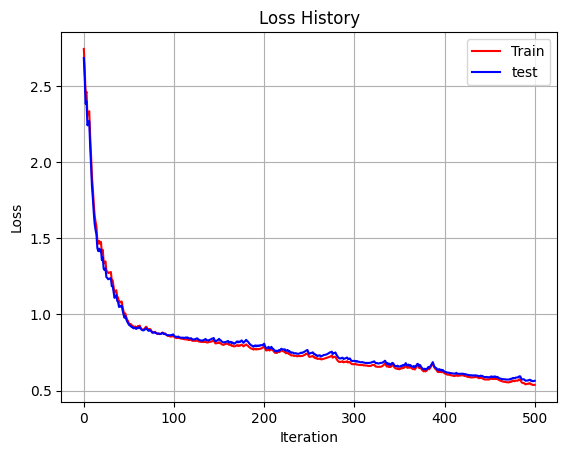

In [17]:
model.plot_history()

### Optimizer : Mini-Batch GD

In [18]:
model.compile(loss='categorical cross-entropy', optimizer='mini-batch GD')

In [19]:
model.summary()

[{'units': 4, 'activation': 'linear'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 3, 'activation': 'softmax'}]
Loss : categorical cross-entropy


### Train the model

In [20]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 0.1524 - Train ACC : 0.9667  - Test Loss : 0.1841 - Test ACC : 0.9667 
Epoch 50/500 - Train Loss : 0.0763 - Train ACC : 0.9833  - Test Loss : 0.1688 - Test ACC : 0.9000 
Epoch 75/500 - Train Loss : 0.0566 - Train ACC : 0.9917  - Test Loss : 0.1883 - Test ACC : 0.9000 
Epoch 100/500 - Train Loss : 0.0450 - Train ACC : 0.9917  - Test Loss : 0.1764 - Test ACC : 0.8667 
Epoch 125/500 - Train Loss : 0.0395 - Train ACC : 0.9917  - Test Loss : 0.1842 - Test ACC : 0.9000 
Training Time : 0.4681 sec.


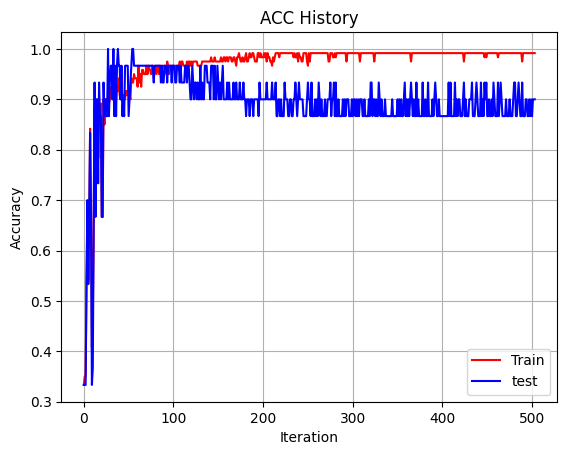

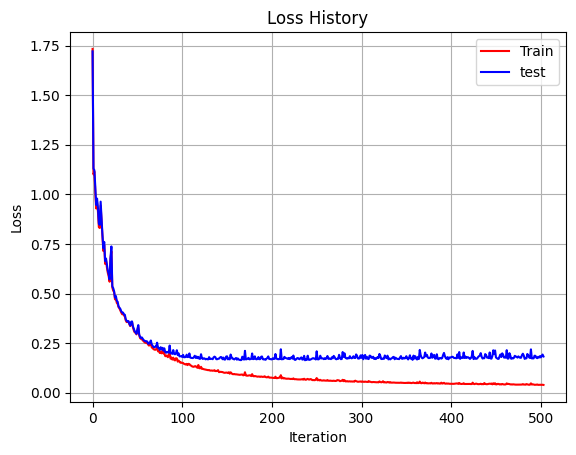

In [21]:
model.plot_history()

### Optimizer : Adam

In [22]:
model.compile(loss='categorical cross-entropy', optimizer='adam')

In [23]:
model.summary()

[{'units': 4, 'activation': 'linear'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 20, 'activation': 'sigmoid'}, {'units': 3, 'activation': 'softmax'}]
Loss : categorical cross-entropy


### Train the model

In [24]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 0.3889 - Train ACC : 0.8750  - Test Loss : 0.3634 - Test ACC : 0.9000 
Epoch 50/500 - Train Loss : 0.1169 - Train ACC : 0.9583  - Test Loss : 0.1451 - Test ACC : 0.9667 
Epoch 75/500 - Train Loss : 0.0390 - Train ACC : 0.9917  - Test Loss : 0.1480 - Test ACC : 0.9333 
Epoch 100/500 - Train Loss : 0.0230 - Train ACC : 0.9917  - Test Loss : 0.1784 - Test ACC : 0.9333 
Epoch 125/500 - Train Loss : 0.0146 - Train ACC : 1.0000  - Test Loss : 0.2282 - Test ACC : 0.9333 
Epoch 150/500 - Train Loss : 0.0077 - Train ACC : 1.0000  - Test Loss : 0.2694 - Test ACC : 0.9333 
Epoch 175/500 - Train Loss : 0.0033 - Train ACC : 1.0000  - Test Loss : 0.3241 - Test ACC : 0.9333 
Epoch 200/500 - Train Loss : 0.0011 - Train ACC : 1.0000  - Test Loss : 0.4107 - Test ACC : 0.9333 
Epoch 225/500 - Train Loss : 0.0003 - Train ACC : 1.0000  - Test Loss : 0.5425 - Test ACC : 0.9333 
Epoch 250/500 - Train Loss : 0.0001 - Train ACC : 1.0000  - Test Loss : 0.6979 - Test ACC : 0.9333 
Epo

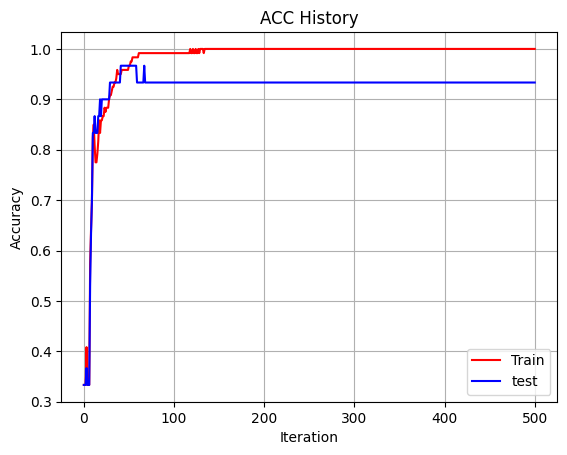

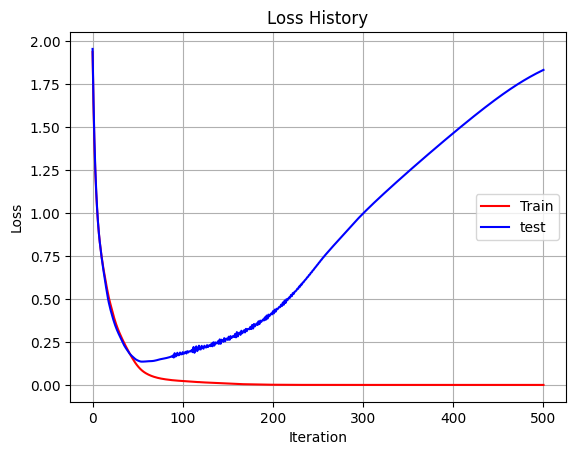

In [25]:
model.plot_history()

### Optimizer : mini-batch Adam

In [26]:
model.compile(loss='categorical cross-entropy', optimizer='mini-batch adam')

### Train the model

In [27]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 0.0437 - Train ACC : 0.9833  - Test Loss : 0.1145 - Test ACC : 0.9000 
Epoch 50/500 - Train Loss : 0.0296 - Train ACC : 0.9917  - Test Loss : 0.1187 - Test ACC : 0.9667 
Epoch 75/500 - Train Loss : 0.0258 - Train ACC : 0.9917  - Test Loss : 0.1502 - Test ACC : 0.9333 
Epoch 100/500 - Train Loss : 0.0351 - Train ACC : 0.9917  - Test Loss : 0.1364 - Test ACC : 0.9000 
Epoch 125/500 - Train Loss : 0.0343 - Train ACC : 0.9833  - Test Loss : 0.2706 - Test ACC : 0.9000 
Training Time : 0.5643 sec.


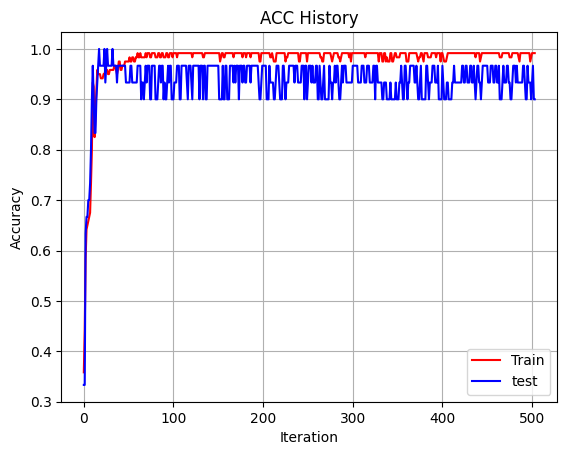

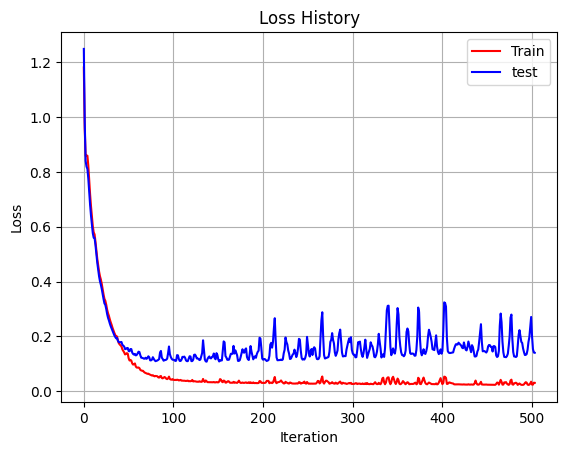

In [28]:
model.plot_history()

# Dataset #2

In [29]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=4, n_clusters_per_class=1,
                           random_state=0)

### Dataset Status

In [30]:
print(f'Num of data : {X.shape[0]}')
print(f'Dimension : {X.shape[1]}')

Num of data : 1000
Dimension : 2


### Split Dataset to train and test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

### Normalize Dataset

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### One hot encoding

In [34]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### MLP Classifier with 3 Hidden layers

In [35]:
model = MLP()

model.add_layer(units=X.shape[1], activation='linear')
model.add_layer(units=128, activation='sigmoid')
model.add_layer(units=64, activation='sigmoid')
model.add_layer(units=32, activation='sigmoid')
model.add_layer(units=y_train_encoded.shape[1], activation='softmax')

### GD

In [80]:
model.compile(loss='categorical cross-entropy', optimizer='GD')

### Train the model

In [81]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.001)

Epoch 25/500 - Train Loss : 0.4060 - Train ACC : 0.8538  - Test Loss : 0.4371 - Test ACC : 0.8250 
Epoch 50/500 - Train Loss : 0.3900 - Train ACC : 0.8700  - Test Loss : 0.4500 - Test ACC : 0.8500 
Epoch 75/500 - Train Loss : 0.3826 - Train ACC : 0.8625  - Test Loss : 0.4534 - Test ACC : 0.8400 
Epoch 100/500 - Train Loss : 0.3560 - Train ACC : 0.8750  - Test Loss : 0.4344 - Test ACC : 0.8300 
Epoch 125/500 - Train Loss : 0.3568 - Train ACC : 0.8625  - Test Loss : 0.4558 - Test ACC : 0.8350 
Epoch 150/500 - Train Loss : 0.3334 - Train ACC : 0.8812  - Test Loss : 0.4161 - Test ACC : 0.8350 
Epoch 175/500 - Train Loss : 0.3276 - Train ACC : 0.8800  - Test Loss : 0.4259 - Test ACC : 0.8500 
Epoch 200/500 - Train Loss : 0.3261 - Train ACC : 0.8762  - Test Loss : 0.4248 - Test ACC : 0.8350 
Epoch 225/500 - Train Loss : 0.3261 - Train ACC : 0.8788  - Test Loss : 0.4199 - Test ACC : 0.8400 
Epoch 250/500 - Train Loss : 0.3186 - Train ACC : 0.8775  - Test Loss : 0.4225 - Test ACC : 0.8450 
Epo

### Visualization (train)

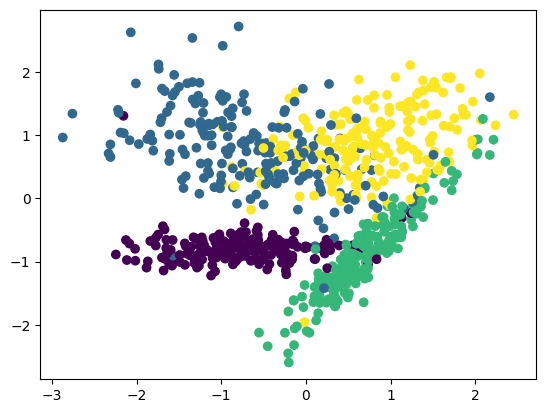

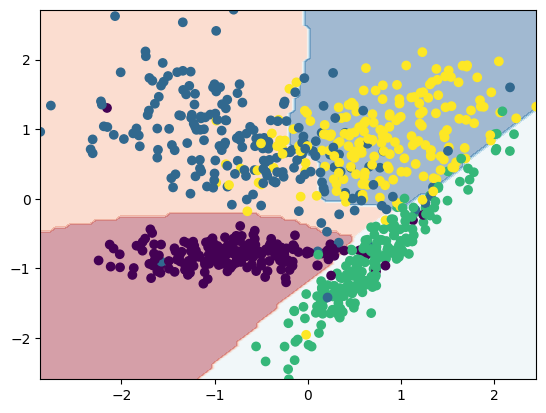

In [82]:
model.visualize(x_train, y_train)

### Visualization (test)

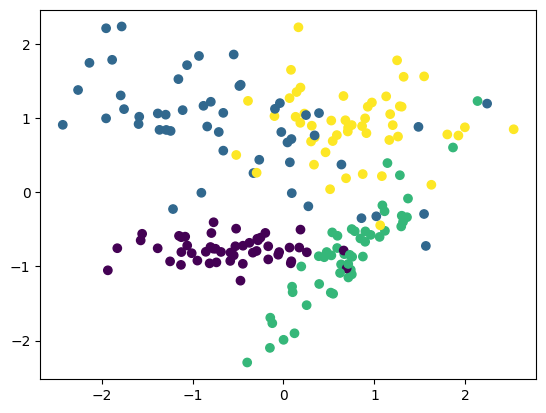

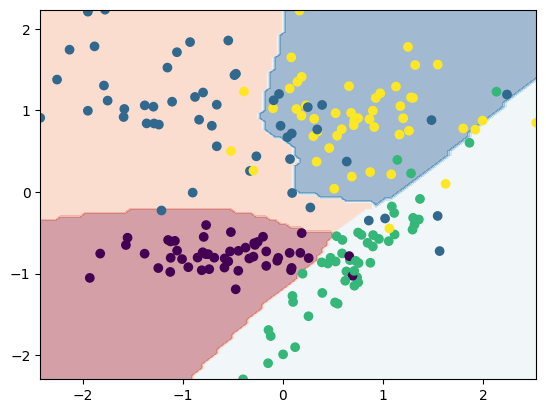

In [83]:
model.visualize(x_test, y_test)

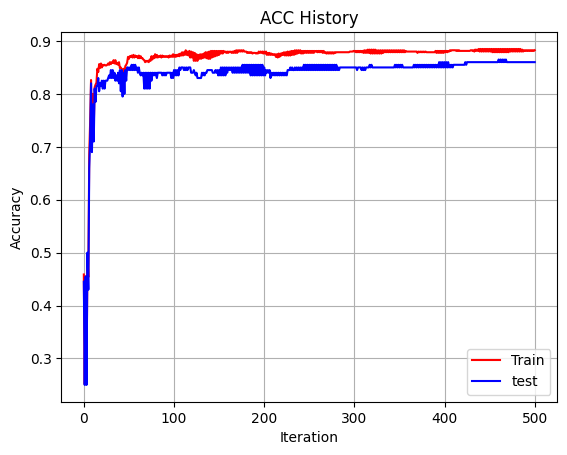

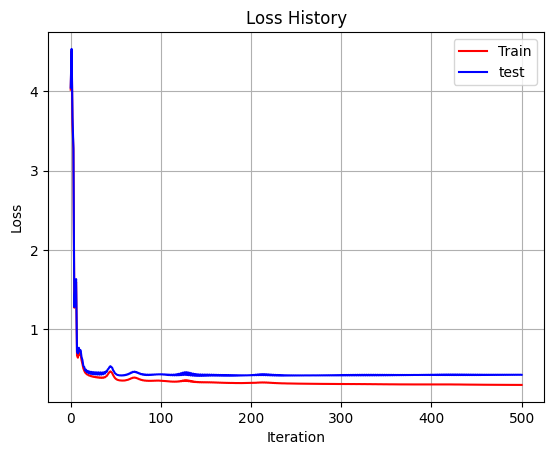

In [84]:
model.plot_history()

### SGD

In [50]:
model.compile(loss='categorical cross-entropy', optimizer='SGD')

### Train the model

In [51]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 2.5132 - Train ACC : 0.3337  - Test Loss : 2.5048 - Test ACC : 0.3100 
Epoch 50/500 - Train Loss : 1.6760 - Train ACC : 0.4963  - Test Loss : 1.6692 - Test ACC : 0.4900 
Epoch 75/500 - Train Loss : 1.2623 - Train ACC : 0.6212  - Test Loss : 1.2747 - Test ACC : 0.6200 
Epoch 100/500 - Train Loss : 0.9742 - Train ACC : 0.6650  - Test Loss : 0.9952 - Test ACC : 0.6450 
Epoch 125/500 - Train Loss : 0.8922 - Train ACC : 0.6813  - Test Loss : 0.9218 - Test ACC : 0.6450 
Epoch 150/500 - Train Loss : 0.8534 - Train ACC : 0.6475  - Test Loss : 0.8895 - Test ACC : 0.6100 
Epoch 175/500 - Train Loss : 0.7601 - Train ACC : 0.7937  - Test Loss : 0.7965 - Test ACC : 0.7500 
Epoch 200/500 - Train Loss : 0.7624 - Train ACC : 0.7500  - Test Loss : 0.8043 - Test ACC : 0.7300 
Epoch 225/500 - Train Loss : 0.6785 - Train ACC : 0.8287  - Test Loss : 0.7081 - Test ACC : 0.8000 
Epoch 250/500 - Train Loss : 0.6560 - Train ACC : 0.8325  - Test Loss : 0.6832 - Test ACC : 0.7900 
Epo

### Visualization (train)

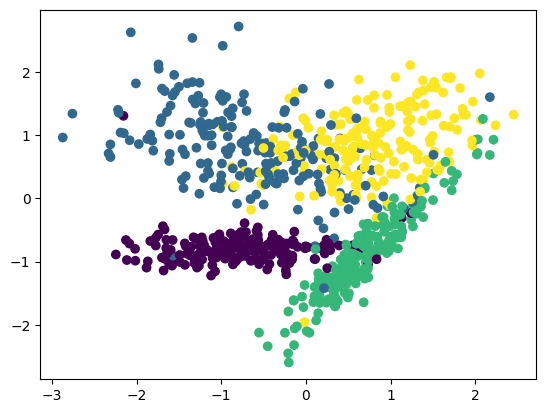

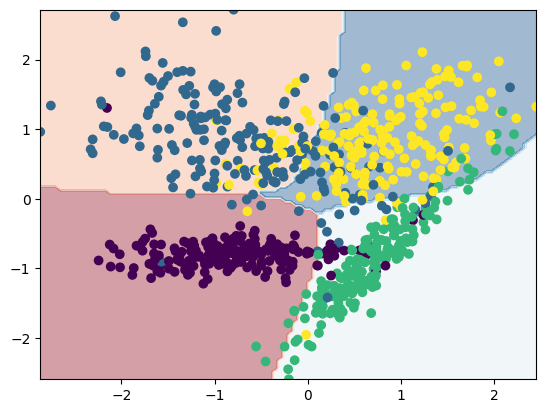

In [53]:
model.visualize(x_train, y_train)

### Visualization (test)

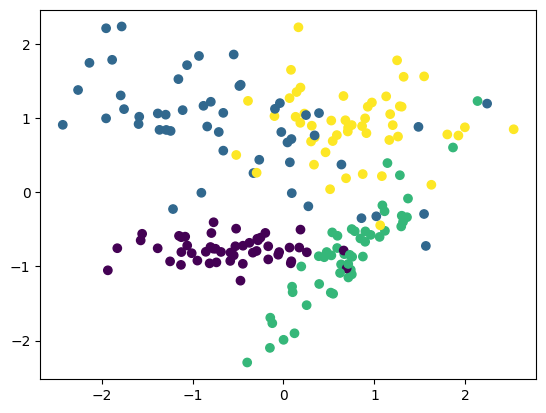

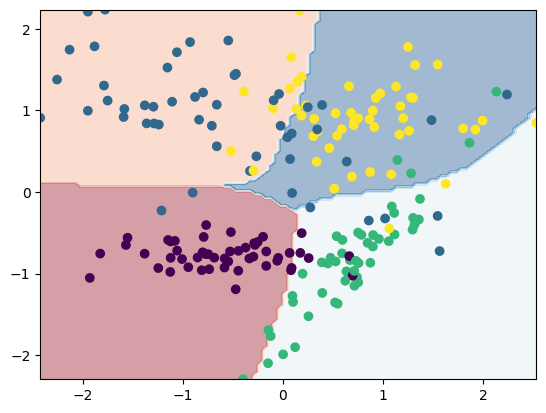

In [54]:
model.visualize(x_test, y_test)

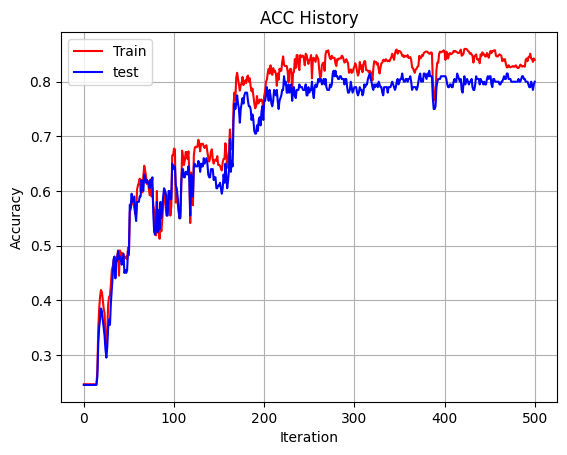

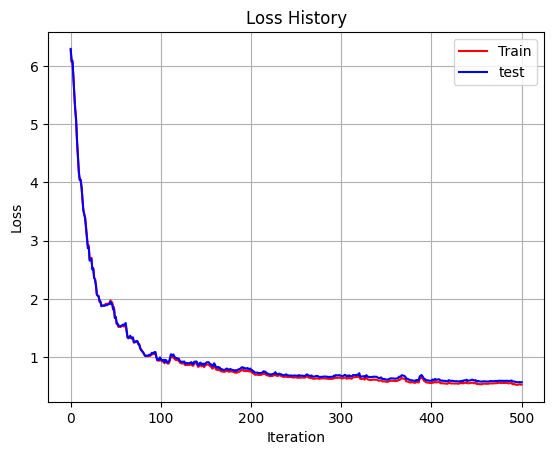

In [55]:
model.plot_history()

### Mini-Batch GD

In [56]:
model.compile(loss='categorical cross-entropy', optimizer='mini-batch GD')

### Train the model

In [57]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Training Time : 2.8750 sec.


### Visualization (train)

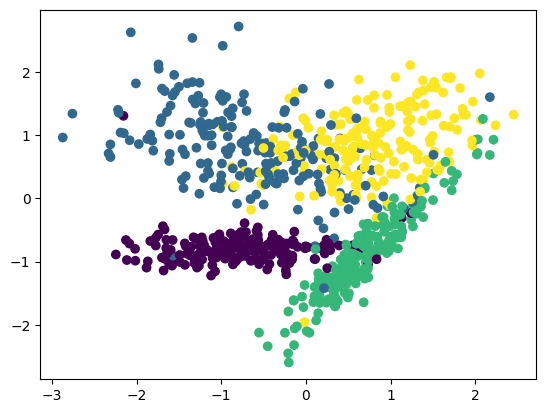

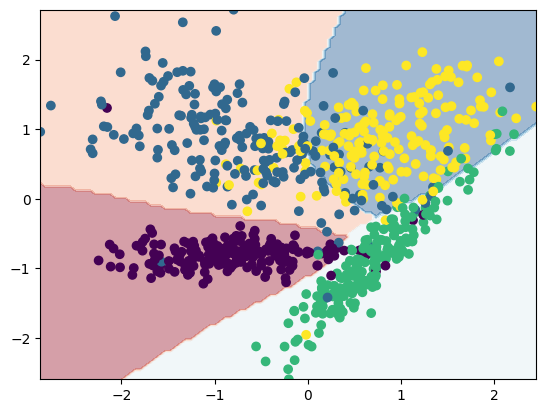

In [58]:
model.visualize(x_train, y_train)

### Visualization (test)

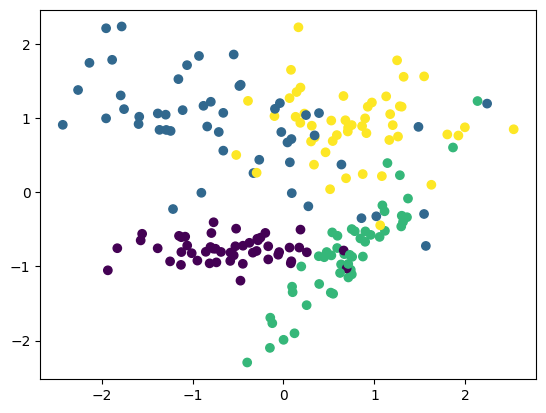

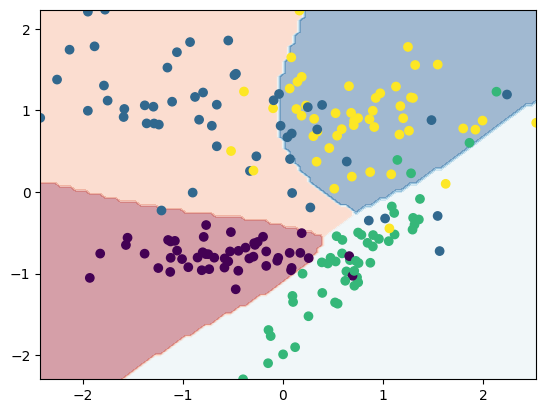

In [59]:
model.visualize(x_test, y_test)

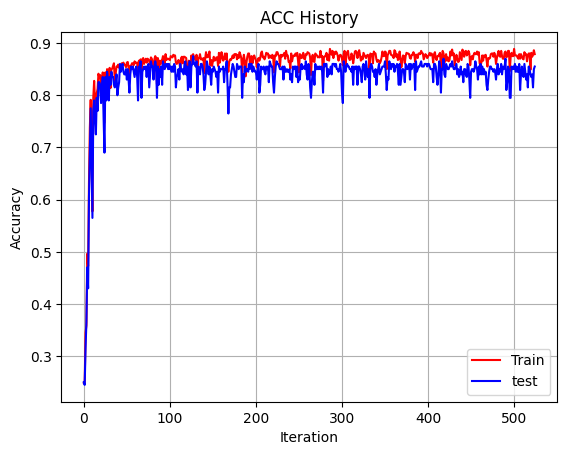

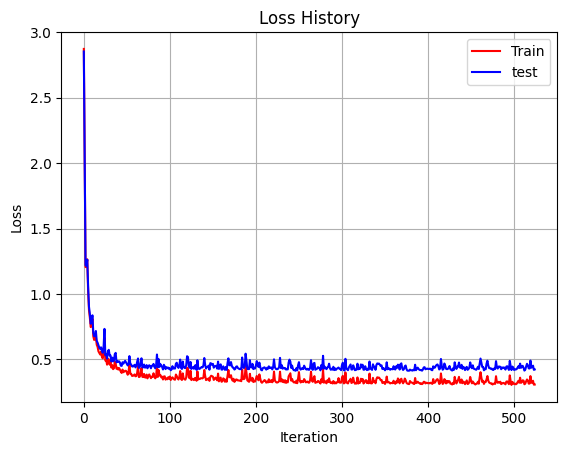

In [60]:
model.plot_history()

### Adam

In [65]:
model.compile(loss='categorical cross-entropy', optimizer='adam')

### Train the model

In [66]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Epoch 25/500 - Train Loss : 0.3678 - Train ACC : 0.8788  - Test Loss : 0.4517 - Test ACC : 0.8650 
Epoch 50/500 - Train Loss : 0.3030 - Train ACC : 0.8875  - Test Loss : 0.4353 - Test ACC : 0.8700 
Epoch 75/500 - Train Loss : 0.2905 - Train ACC : 0.8900  - Test Loss : 0.4540 - Test ACC : 0.8550 
Epoch 100/500 - Train Loss : 0.2830 - Train ACC : 0.8888  - Test Loss : 0.4531 - Test ACC : 0.8550 
Epoch 125/500 - Train Loss : 0.2759 - Train ACC : 0.8900  - Test Loss : 0.4614 - Test ACC : 0.8450 
Epoch 150/500 - Train Loss : 0.2714 - Train ACC : 0.8912  - Test Loss : 0.4716 - Test ACC : 0.8550 
Epoch 175/500 - Train Loss : 0.2647 - Train ACC : 0.8912  - Test Loss : 0.4836 - Test ACC : 0.8500 
Epoch 200/500 - Train Loss : 0.2592 - Train ACC : 0.8925  - Test Loss : 0.4928 - Test ACC : 0.8450 
Epoch 225/500 - Train Loss : 0.2538 - Train ACC : 0.8962  - Test Loss : 0.5085 - Test ACC : 0.8500 
Epoch 250/500 - Train Loss : 0.2466 - Train ACC : 0.9012  - Test Loss : 0.5125 - Test ACC : 0.8450 
Epo

### Visualization (train)

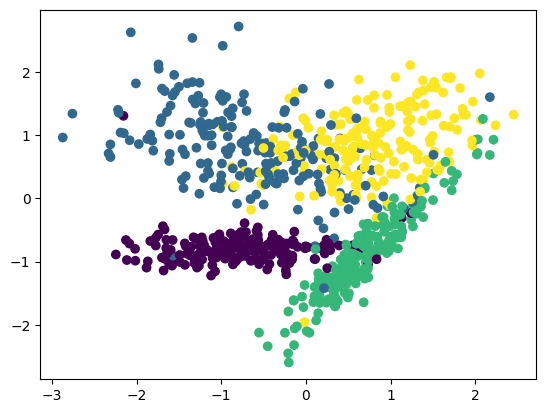

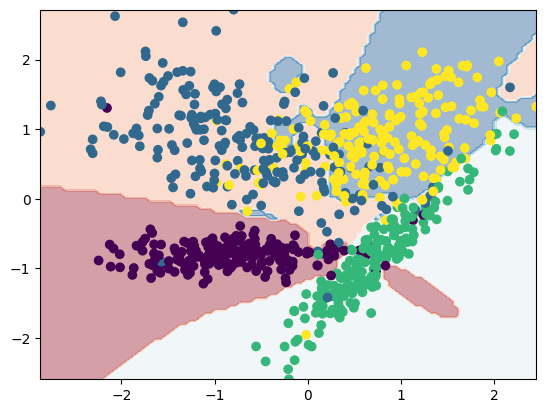

In [67]:
model.visualize(x_train, y_train)

### Visualization (test)

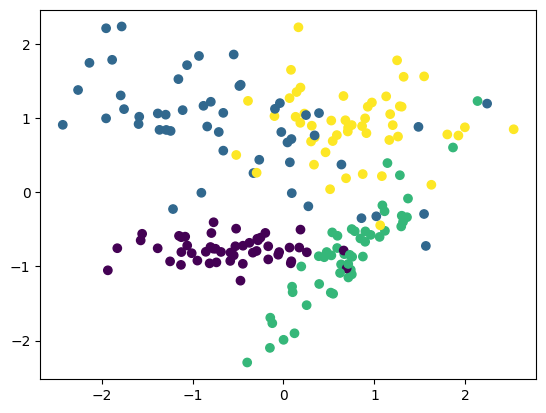

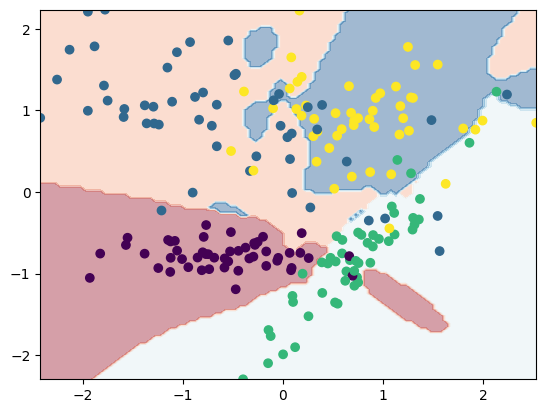

In [68]:
model.visualize(x_test, y_test)

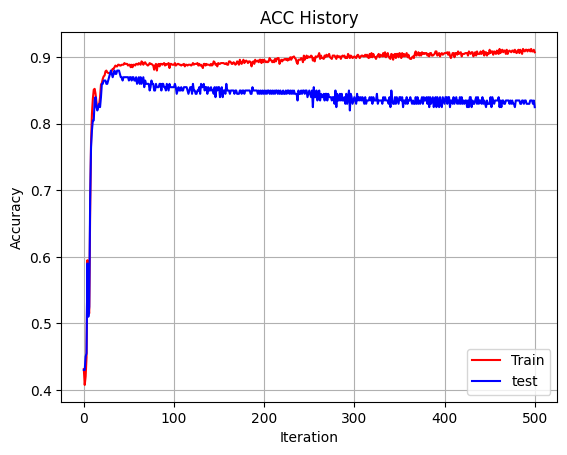

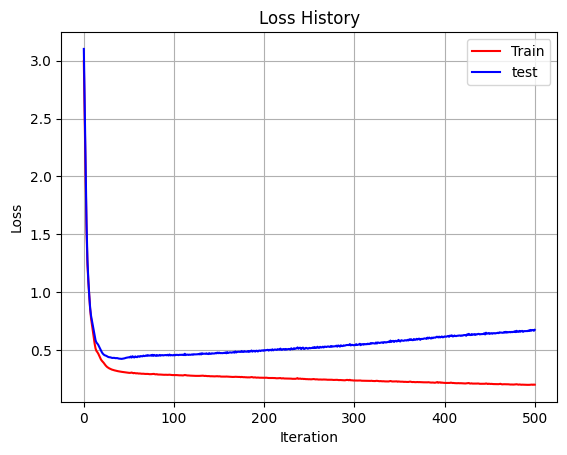

In [69]:
model.plot_history()

### Mini-Batch Adam

In [70]:
model.compile(loss='categorical cross-entropy', optimizer='mini-batch adam')

### Train the model

In [71]:
model.fit(x_train, y_train_encoded, data_test=(x_test, y_test_encoded), iters=500, eta=0.01)

Training Time : 3.0041 sec.


### Visualization (train)

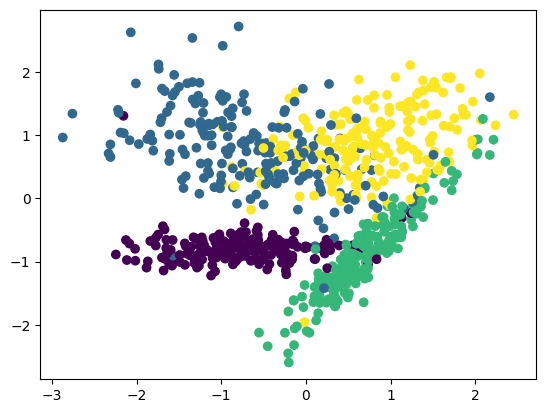

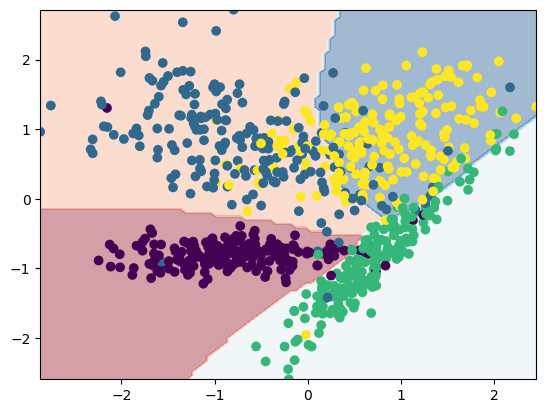

In [72]:
model.visualize(x_train, y_train)

### Visualization (test)

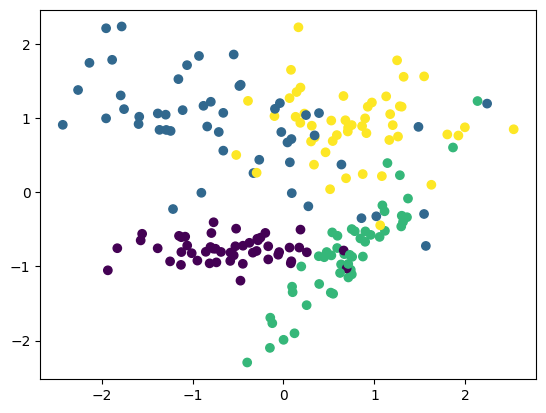

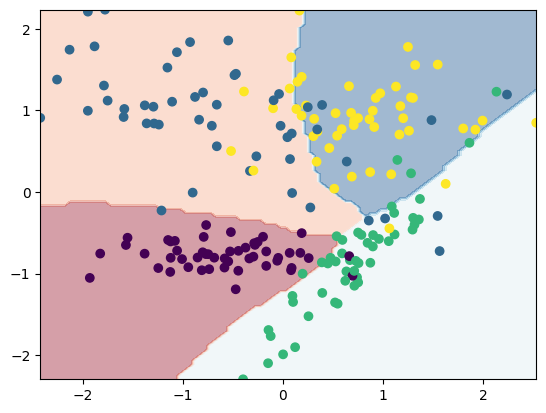

In [73]:
model.visualize(x_test, y_test)

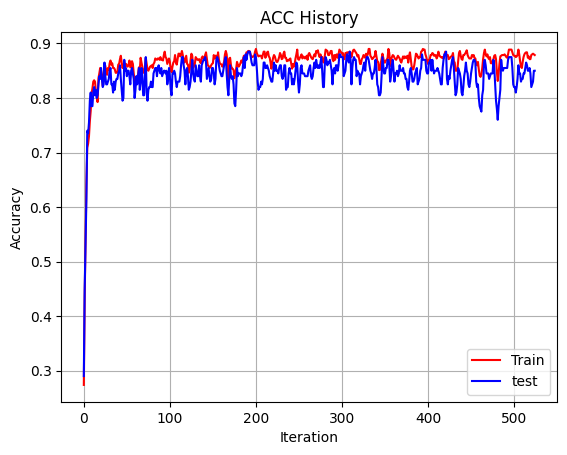

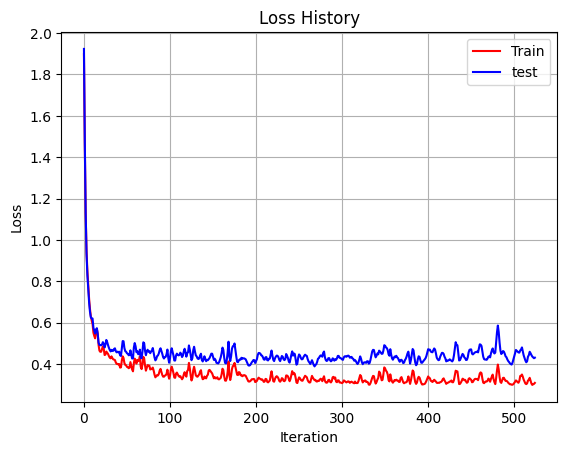

In [74]:
model.plot_history()